# Import Necessary Libraries

In [39]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [15]:
pd.set_option('max_columns',31)

In [16]:
forest_fire_data = pd.read_csv('forestfires.csv')
forest_fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


# Data Understanding

In [17]:
forest_fire_data.shape

(517, 31)

In [18]:
forest_fire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [19]:
forest_fire_data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [20]:
forest_fire_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

## Problem statement : PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

#### Output
* size_category

# Data Preprocessing

Since dummy variables of month and day are already available so we can drop month and day features

In [21]:
forest_fire_data= forest_fire_data.drop(labels=['month','day'],axis=1)

In [22]:
forest_fire_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [23]:
le = LabelEncoder()

In [24]:
forest_fire_data['size_category'] = le.fit_transform(forest_fire_data['size_category'])

In [25]:
forest_fire_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [26]:
X = forest_fire_data.drop(labels='size_category',axis=1)
y = forest_fire_data[['size_category']]

In [27]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [29]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


# Model Building

### Build The Architecture

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=15,test_size=0.20)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413, 1), (104, 1))

In [35]:
model = Sequential()
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

### Model Compiling

In [36]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

# Model Training 

In [37]:
model_training = model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,validation_data=(X_test,y_test))
model_training

Epoch 1/10
13/13 [==============================] - 3s 28ms/step - loss: 0.6188 - accuracy: 0.6877 - val_loss: 0.6167 - val_accuracy: 0.7596
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.7506 - val_loss: 0.6195 - val_accuracy: 0.7596
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4944 - accuracy: 0.7700 - val_loss: 0.6350 - val_accuracy: 0.7596
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.7845 - val_loss: 0.6390 - val_accuracy: 0.7692
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4321 - accuracy: 0.7966 - val_loss: 0.6479 - val_accuracy: 0.7692
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3968 - accuracy: 0.8111 - val_loss: 0.6646 - val_accuracy: 0.7692
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3698 - accuracy: 0.8426 - val_loss: 0.6839 - val_accuracy: 0.7885
Epoch 8/10
13/13 [=

# Model Prediction

In [38]:
pred = model.predict(X_test)
rounded = [round(x[0]) for x in pred]
y_pred = pd.DataFrame(rounded)
y_pred

4/4 [==============================] - 0s 3ms/step


,0
0,1
1,1
2,0
3,1
4,1
...,...
99,1
100,1
101,1
102,1


# Model Evaluation

In [40]:
model_results = model.evaluate(x=X_test,y=y_test)
print('Model Loss          :',round(model_results[0],4))
print('Accuracy            :',round(model_results[1],4))


4/4 [==============================] - 0s 3ms/step - loss: 0.7724 - accuracy: 0.8077
Model Loss          : 0.7724
Accuracy            : 0.8077


# Model Performance

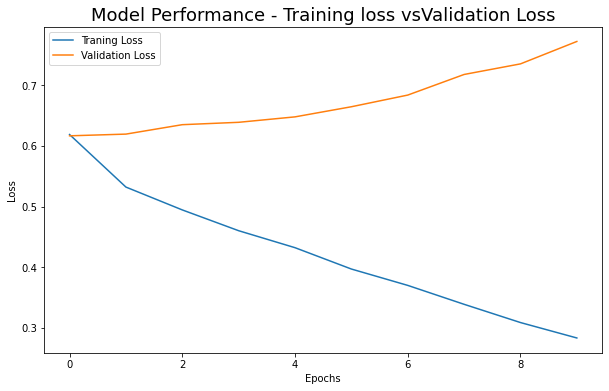

In [41]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],label='Traning Loss')
plt.plot(model_training.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training loss vsValidation Loss',size=18)
plt.legend()
plt.show()

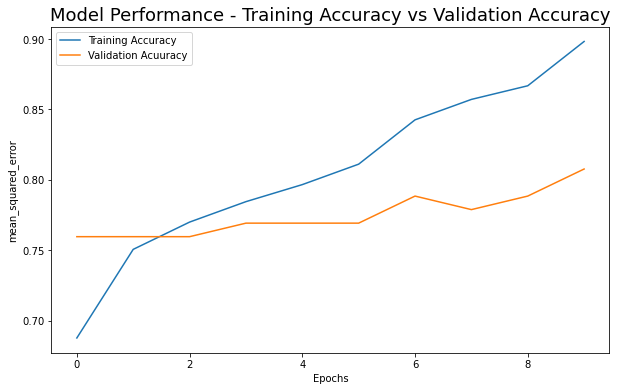

In [42]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['accuracy'],label='Training Accuracy')
plt.plot(model_training.history['val_accuracy'],label='Validation Acuuracy')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.title('Model Performance - Training Accuracy vs Validation Accuracy',size=18)
plt.legend()
plt.show()

## Tuning Hyperparameters for better accuracy

### Using 'tanh' Activation Function 

# Model Building

### Build The Architecture

In [43]:
model = Sequential()
model.add(Dense(units=200,activation='tanh'))
model.add(Dense(units=100,activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))

### Model Compiling

In [44]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

# Model Training 

In [45]:
model_training = model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,validation_data=(X_test,y_test))
model_training

Epoch 1/10
13/13 [==============================] - 1s 27ms/step - loss: 0.6540 - accuracy: 0.6223 - val_loss: 0.5776 - val_accuracy: 0.7308
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.5108 - accuracy: 0.8063 - val_loss: 0.5171 - val_accuracy: 0.7885
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4489 - accuracy: 0.7990 - val_loss: 0.5061 - val_accuracy: 0.7885
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.4076 - accuracy: 0.8087 - val_loss: 0.4836 - val_accuracy: 0.7692
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 0.3801 - accuracy: 0.8232 - val_loss: 0.4744 - val_accuracy: 0.7981
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 0.3544 - accuracy: 0.8426 - val_loss: 0.4696 - val_accuracy: 0.8077
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.8620 - val_loss: 0.4657 - val_accuracy: 0.8077
Epoch 8/10
13/13 [

# Model Prediction

In [46]:
pred = model.predict(X_test)
rounded = [round(x[0]) for x in pred]
y_pred = pd.DataFrame(rounded)
y_pred

4/4 [==============================] - 0s 6ms/step


,0
0,1
1,1
2,0
3,1
4,1
...,...
99,1
100,1
101,1
102,1


# Model Evaluation

In [47]:
model_results = model.evaluate(x=X_test,y=y_test)
print('Model Loss          :',round(model_results[0],4))
print('Accuracy            :',round(model_results[1],4))


4/4 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8365
Model Loss          : 0.4513
Accuracy            : 0.8365


### Using 'softmax' Activation Function 

# Model Building

### Build The Architecture

In [48]:
model = Sequential()
model.add(Dense(units=200,activation='softmax'))
model.add(Dense(units=100,activation='softmax'))
model.add(Dense(units=1,activation='sigmoid'))

### Model Compiling

In [49]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

# Model Training 

In [50]:
model_training = model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,validation_data=(X_test,y_test))
model_training

Epoch 1/10
13/13 [==============================] - 1s 18ms/step - loss: 0.6905 - accuracy: 0.7240 - val_loss: 0.6862 - val_accuracy: 0.7596
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.7240 - val_loss: 0.6797 - val_accuracy: 0.7596
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.7240 - val_loss: 0.6732 - val_accuracy: 0.7596
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.7240 - val_loss: 0.6669 - val_accuracy: 0.7596
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6683 - accuracy: 0.7240 - val_loss: 0.6611 - val_accuracy: 0.7596
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6636 - accuracy: 0.7240 - val_loss: 0.6552 - val_accuracy: 0.7596
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6588 - accuracy: 0.7240 - val_loss: 0.6499 - val_accuracy: 0.7596
Epoch 8/10
13/13 [=

# Model Prediction

In [51]:
pred = model.predict(X_test)
rounded = [round(x[0]) for x in pred]
y_pred = pd.DataFrame(rounded)
y_pred

4/4 [==============================] - 0s 3ms/step


,0
0,1
1,1
2,1
3,1
4,1
...,...
99,1
100,1
101,1
102,1


# Model Evaluation

In [52]:
model_results = model.evaluate(x=X_test,y=y_test)
print('Model Loss          :',round(model_results[0],4))
print('Accuracy            :',round(model_results[1],4))


4/4 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.7596
Model Loss          : 0.6353
Accuracy            : 0.7596


In [55]:
results = {'Activation Function':['relu','tanh','softmax'],'Model Loss':[0.7724,0.4513,0.6324],'Model Accuracy':[0.8077,0.8365,0.7596]}

In [56]:
results = pd.DataFrame(results)
results

,Activation Function,Model Loss,Model Accuracy
0,relu,0.7724,0.8077
1,tanh,0.4513,0.8365
2,softmax,0.6324,0.7596


### Best Activation Function is 'tanh'

## Tuning of batch_size and epochs for better accuracy

In [57]:
def creat_model(batch_size,epochs):
    model = Sequential()
    model.add(Dense(units=200,activation='tanh'))
    model.add(Dense(units=100,activation='tanh'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
    model_training = model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test))
    model_results = model.evaluate(x=X_test,y=y_test)
    print('Model Loss          :',round(model_results[0],4))
    print('Accuracy            :',round(model_results[1],4))
    return model


#### Tuning batch_size keeping epochs constant

In [58]:
creat_model(10,10)

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 0.5942 - accuracy: 0.7094 - val_loss: 0.5345 - val_accuracy: 0.7692
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7990 - val_loss: 0.5174 - val_accuracy: 0.7692
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8208 - val_loss: 0.4807 - val_accuracy: 0.8077
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8450 - val_loss: 0.4767 - val_accuracy: 0.8077
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8741 - val_loss: 0.4695 - val_accuracy: 0.8077
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2700 - accuracy: 0.8886 - val_loss: 0.4685 - val_accuracy: 0.8462
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9080 - val_loss: 0.4337 - val_accuracy: 0.8462
Epoch 8/10
42/42 [==

In [59]:
creat_model(20,10)

Epoch 1/10
21/21 [==============================] - 1s 11ms/step - loss: 0.6352 - accuracy: 0.6707 - val_loss: 0.5787 - val_accuracy: 0.7500
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.4838 - accuracy: 0.7893 - val_loss: 0.5434 - val_accuracy: 0.7692
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.4320 - accuracy: 0.8015 - val_loss: 0.5350 - val_accuracy: 0.7692
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8184 - val_loss: 0.5270 - val_accuracy: 0.7981
Epoch 5/10
21/21 [==============================] - 0s 5ms/step - loss: 0.3629 - accuracy: 0.8499 - val_loss: 0.5249 - val_accuracy: 0.8077
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8668 - val_loss: 0.5361 - val_accuracy: 0.8173
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.8814 - val_loss: 0.5060 - val_accuracy: 0.8269
Epoch 8/10
21/21 [=

In [60]:
creat_model(30,10)

Epoch 1/10
14/14 [==============================] - 1s 18ms/step - loss: 0.6524 - accuracy: 0.6295 - val_loss: 0.5982 - val_accuracy: 0.7788
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.8111 - val_loss: 0.5307 - val_accuracy: 0.7692
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4347 - accuracy: 0.7966 - val_loss: 0.5194 - val_accuracy: 0.7692
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.8136 - val_loss: 0.5010 - val_accuracy: 0.7788
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3763 - accuracy: 0.8354 - val_loss: 0.5041 - val_accuracy: 0.8077
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3410 - accuracy: 0.8475 - val_loss: 0.4936 - val_accuracy: 0.8173
Epoch 7/10
14/14 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 0.8717 - val_loss: 0.5073 - val_accuracy: 0.8173
Epoch 8/10
14/14 [=

In [61]:
creat_model(40,10)

Epoch 1/10
11/11 [==============================] - 1s 21ms/step - loss: 0.6793 - accuracy: 0.6174 - val_loss: 0.6073 - val_accuracy: 0.7596
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.5246 - accuracy: 0.7869 - val_loss: 0.5454 - val_accuracy: 0.7692
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 0.4610 - accuracy: 0.8087 - val_loss: 0.5081 - val_accuracy: 0.7692
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 0.4212 - accuracy: 0.8063 - val_loss: 0.5036 - val_accuracy: 0.7692
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3955 - accuracy: 0.8160 - val_loss: 0.5066 - val_accuracy: 0.7885
Epoch 6/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3718 - accuracy: 0.8305 - val_loss: 0.5000 - val_accuracy: 0.7981
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3534 - accuracy: 0.8475 - val_loss: 0.4956 - val_accuracy: 0.7981
Epoch 8/10
11/11 [=

#### For batch_size=10 model gives the best accuracy

#### Tuning epochs keeping batch size constant

In [62]:
creat_model(10,10)

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 0.5879 - accuracy: 0.6828 - val_loss: 0.5200 - val_accuracy: 0.7885
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7942 - val_loss: 0.5001 - val_accuracy: 0.7788
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8354 - val_loss: 0.4767 - val_accuracy: 0.8173
Epoch 4/10
42/42 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.8620 - val_loss: 0.4959 - val_accuracy: 0.8269
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8692 - val_loss: 0.4650 - val_accuracy: 0.8558
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.8983 - val_loss: 0.5175 - val_accuracy: 0.8462
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2460 - accuracy: 0.9080 - val_loss: 0.5089 - val_accuracy: 0.8269
Epoch 8/10
42/42 [==

In [63]:
creat_model(10,50)

Epoch 1/50
42/42 [==============================] - 1s 9ms/step - loss: 0.5963 - accuracy: 0.6973 - val_loss: 0.5081 - val_accuracy: 0.7788
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.7990 - val_loss: 0.5134 - val_accuracy: 0.7788
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8281 - val_loss: 0.4856 - val_accuracy: 0.8173
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8571 - val_loss: 0.4601 - val_accuracy: 0.8173
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8644 - val_loss: 0.4591 - val_accuracy: 0.8365
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.8814 - val_loss: 0.4346 - val_accuracy: 0.8365
Epoch 7/50
42/42 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.9128 - val_loss: 0.4729 - val_accuracy: 0.8558
Epoch 8/50
42/42 [==

In [64]:
creat_model(10,100)

Epoch 1/100
42/42 [==============================] - 1s 7ms/step - loss: 0.6123 - accuracy: 0.6828 - val_loss: 0.5246 - val_accuracy: 0.7788
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.8136 - val_loss: 0.4897 - val_accuracy: 0.7788
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8329 - val_loss: 0.4594 - val_accuracy: 0.7981
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8547 - val_loss: 0.4754 - val_accuracy: 0.8173
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8571 - val_loss: 0.4458 - val_accuracy: 0.8269
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.8838 - val_loss: 0.4281 - val_accuracy: 0.8269
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.8983 - val_loss: 0.4216 - val_accuracy: 0.8654
Epoch 8/100
4

Epoch 59/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9927 - val_loss: 0.5473 - val_accuracy: 0.9423
Epoch 60/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9952 - val_loss: 0.5732 - val_accuracy: 0.9231
Epoch 61/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9952 - val_loss: 0.5489 - val_accuracy: 0.9327
Epoch 62/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.6186 - val_accuracy: 0.9135
Epoch 63/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.5047 - val_accuracy: 0.9327
Epoch 64/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.5272 - val_accuracy: 0.9231
Epoch 65/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9976 - val_loss: 0.5864 - val_accuracy: 0.9038
Epoch 

#### For epochs=100 Model giving the best accuracy

# Best Model : Activation Function = 'tanh', batch_size=10, epochs=100

# ==========================THE END===========================